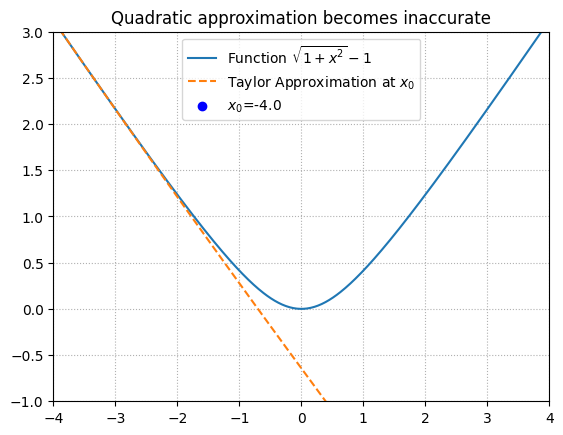

In [33]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import jax.numpy as jnp
from jax import grad, jit

# Define the function
def f(x):
    return (1 + x**2)**(1/2) - 1

# Get the gradient and hessian of the function
df = jit(grad(f))
d2f = jit(grad(df))

# Define the Taylor approximation at a point x
def taylor_approximation(x, x0):
    return f(x0) + df(x0) * (x - x0) + 0.5 * d2f(x0) * (x - x0)**2

# Define the minimum of the Taylor approximation
def taylor_min(x0):
    return x0 - df(x0) / d2f(x0)

# Set up the animation
fig, ax = plt.subplots()
x = jnp.linspace(-4, 4, 400)

def animate(i):
    ax.clear()
    # Adjusting xi to oscillate between -4 and 4
    xi = -4 + (8 / 800) * (i % 800) if i < 800 else 4 - (8 / 800) * (i % 800)
    ax.plot(x, f(x), label="Function $\sqrt{1 + x^2} - 1$")
    ax.plot(x, taylor_approximation(x, xi), label=f"Taylor Approximation at $x_0$", linestyle='dashed')
    ax.scatter([xi], [f(xi)], color='blue', label=f"$x_0$={xi:.1f}")
    ax.scatter([taylor_min(xi)], [taylor_approximation(taylor_min(xi), xi)], color='orange')
    ax.legend(loc="upper center")
    ax.set_title('Quadratic approximation becomes inaccurate')
    ax.set_ylim([-1, 3])
    ax.set_xlim([-4, 4])
    ax.grid(linestyle=":")

# Adjusted frames to have a complete oscillation
ani = animation.FuncAnimation(fig, animate, frames=range(1600), repeat=True)

# Save the animation
# ani.save('inaccurate_taylor.mp4', writer='ffmpeg', fps=60, dpi=200)

# plt.show()


# Plotly

In [2]:
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "plotly_mimetype+notebook_connected"

import jax.numpy as jnp
from jax import grad, jit

# Define the function
def f(x):
    return (1 + x**2)**(1/2) - 1

# Get the gradient and hessian of the function
df = jit(grad(f))
d2f = jit(grad(df))

# Define the Taylor approximation at a point x
def taylor_approximation(x, x0):
    return f(x0) + df(x0) * (x - x0) + 0.5 * d2f(x0) * (x - x0)**2

# Define the minimum of the Taylor approximation
def taylor_min(x0):
    return x0 - df(x0) / d2f(x0)

# Generate curve data
x = jnp.linspace(-4, 4, 50)
xi = -4.
xis = jnp.linspace(-4, 4, 400)
xis = jnp.concatenate([xis, jnp.linspace(4, -4, 400)])

# Create figure
fig = go.Figure(
    data=[
        go.Scatter(x=x, y=f(x),
                     name="Function $\sqrt{1 + x^2} - 1$",
                     hoverinfo="none",
                     mode="lines",
                     line=dict(width=2, color="black")),
        go.Scatter(x=x,y=taylor_approximation(x, xi),
                     name="Taylor Approximation at $x_0$",
                     hoverinfo="none",
                     mode="lines",
                     line=dict(width=2, color="orange", dash="dash")),
        go.Scatter(x=[taylor_min(xi)], y=[taylor_approximation(taylor_min(xi), xi)],
                   showlegend=False,
                   hoverinfo="none",
                     mode="markers",
                     marker=dict(size=15, color="orange")),
        go.Scatter(x=[xi], y=[f(xi)],
                   hoverinfo="none",
                     name=f"$x_0$={xi:.1f}",
                     mode="markers",
                     marker=dict(size=15, color="black"))
        ],
    layout=go.Layout(
                     xaxis=dict(range=[-4, 4], autorange=False, zeroline=False),
                     yaxis=dict(range=[-1, 3], autorange=False, zeroline=False),
                     title='Quadratic approximation becomes inaccurate',
                     hovermode="closest",
                     updatemenus=[dict(type="buttons",
                                       buttons=[dict(label="▶️",
                                                     method="animate",
                                                     args= [None, {"frame": {"duration": 15, 
                                                                        "redraw": False}}]
                                                     )])]),

    frames=[go.Frame(
        data=[go.Scatter(x=x,y=taylor_approximation(x, xi),
                name="Taylor Approximation at $x_0$",
                hoverinfo="none",
                mode="lines",
                line=dict(width=2, color="orange", dash="dash")),
            go.Scatter(x=[taylor_min(xi)], y=[taylor_approximation(taylor_min(xi), xi)],
                     mode="markers",
                     hoverinfo="none",
                     marker=dict(size=15, color="orange")),
            go.Scatter(x=[xi], y=[f(xi)],
                     name=f"$x_0$={xi:.1f}",
                     mode="markers",
                     hoverinfo="none",
                     marker=dict(size=15, color="black")),
            go.Scatter(x=x, y=f(x),
                     name="Function $\sqrt{1 + x^2} - 1$",
                     hoverinfo="none",
                     mode="lines",
                     line=dict(width=2, color="black"))
        ]) for xi in xis]
)

fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=-0.3,
    xanchor="left",
    x=0.2
),
template="plotly_white")
fig.update_xaxes(griddash="dot")
fig.update_yaxes(griddash="dot")

plotly_config = {
    'displaylogo': False,
    'toImageButtonOptions': {
        'format': 'svg', # one of png, svg, jpeg, webp
        'filename': 'fmin',
        'height': None,
        'width': None,
        'scale': 1 # Multiply title/legend/axis/canvas sizes by this factor
    },
    'modeBarButtonsToRemove': ['select2d', 'lasso2d'],
    'modeBarButtonsToAdd': [
                            'drawopenpath',
                            'eraseshape'
                            ]
}

fig.write_html(
        "plotly_taylor.html",
        config=plotly_config,
        include_plotlyjs="cdn",
        full_html=True,
    )

fig.show()